## Filtro promedio

Imagen de trabajo: *meb.png*

El filtro promedio es calculado por convolución de la imagen con una imagen uniforme.
Corresponde al “suavizado” de la imagen.
Ejercicio:

1. Visualice la imagen y su histograma.
2. Describa su forma (continuo?, discontinuo?, niveles de gris?, ...)
3. Aplique el filtro promedio utilizando una máscara de tamaño 3x3 a esta imagen. Cualitativamente, cómo es la imagen resultado?
4. Visualice el histograma de esta nueva imagen, y compárelo con el histograma de la imagen original (forma general, altura de los picos, ...) .
5. Calcule la imagen de diferencia con la original. Justifique el resultado obtenido (en cuáles regiones de la imagen son visibles las diferencias?, por qué?...)
6. Ahora filtre la imagen original con un filtro promedio utilizando una máscara de tamaño 5x5. Paralelamente, filtre la imagen original, aplicando consecutivamente sobre esta, dos filtros promedio de tamaño 3x3. Haga una evaluación visual de los resultados:
   - Las dos imágenes obtenidas son idénticas?
   - Por qué?
   - Cuál de los dos tratamientos suprime mejor los cambios de nivel de gris de la imagen?

## Importaciones

In [1]:
from skimage import data, color, img_as_ubyte
import skimage.util as util
import skimage.filters as filters
from skimage.morphology import footprint_rectangle
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

## Funciones

In [2]:
def comparar_images(imagen1, imagen2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax2.imshow(imagen2, cmap='gray')

In [3]:
def show_histogram(imagen):
  plt.hist(imagen.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
  plt.show()

In [4]:
def comparar_histogramas(imagen1, imagen2, imagen1_name="Imagen 1", imagen2_name="Imagen 2"):
    # Convertir a escala de grises si son RGB
    if len(imagen1.shape) == 3:
        imagen1 = color.rgb2gray(imagen1)
    if len(imagen2.shape) == 3:
        imagen2 = color.rgb2gray(imagen2)

    # Calcular histogramas
    hist1, bins1 = np.histogram(imagen1.flatten(), bins=256, range=[0,1])
    hist2, bins2 = np.histogram(imagen2.flatten(), bins=256, range=[0,1])

    # Graficar imágenes y histogramas
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Mostrar imágenes
    axs[0, 0].imshow(imagen1, cmap="gray")
    axs[0, 0].set_title(imagen1_name)
    axs[0, 0].axis("off")

    axs[0, 1].imshow(imagen2, cmap="gray")
    axs[0, 1].set_title(imagen2_name)
    axs[0, 1].axis("off")

    # Mostrar histogramas
    axs[1, 0].plot(bins1[:-1], hist1, color="black")
    axs[1, 0].set_title(f"Histograma de {imagen1_name}")
    axs[1, 0].set_xlabel("Intensidad")
    axs[1, 0].set_ylabel("Frecuencia")

    axs[1, 1].plot(bins2[:-1], hist2, color="black")
    axs[1, 1].set_title(f"Histograma de {imagen2_name}")
    axs[1, 1].set_xlabel("Intensidad")
    axs[1, 1].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


## Solucion

Dimensiones: (256, 256, 3)


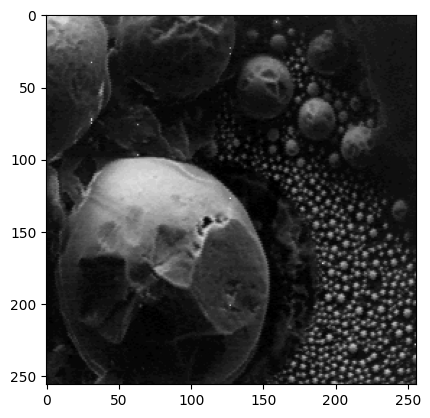

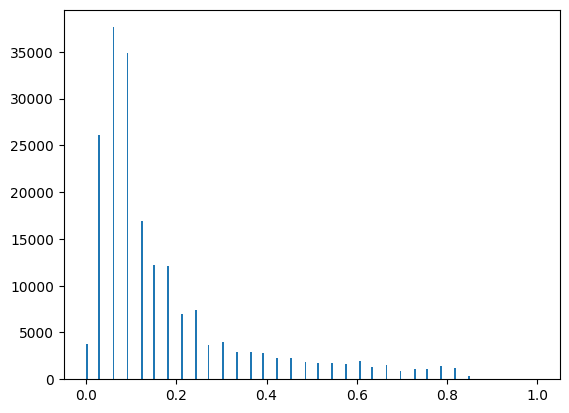

In [5]:
# Imagen de ejercicio
img_ejercicio_original = mpimg.imread('../Imagenes/MEB.png')

# Pasarlo unicamente a 3 canales
img_ejercicio = img_ejercicio_original[:, :, :3]
print('Dimensiones:', img_ejercicio.shape)

plt.imshow(img_ejercicio)
plt.show()

show_histogram(img_ejercicio)

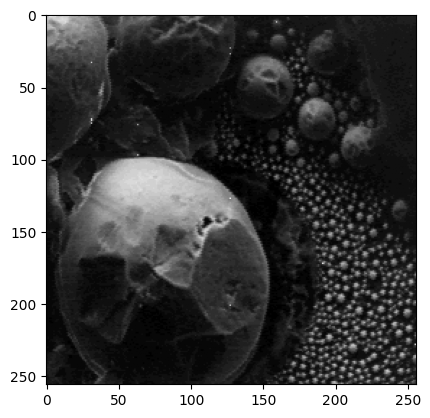

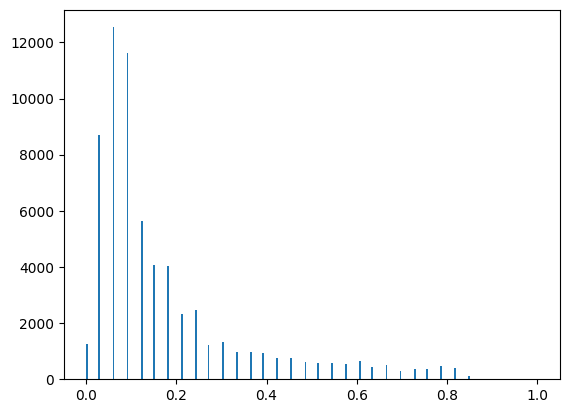

In [6]:
# Escala de grises

img_ejercicio_gray = color.rgb2gray(img_ejercicio)
plt.imshow(img_ejercicio_gray, cmap='gray')
plt.show()

show_histogram(img_ejercicio_gray)

c:\Users\DELL\Documents\DAVID\Universidad\Semestre 7\Computacion Grafica\comp_graf_env\Lib\site-packages\IPython\core\interactiveshell.py:3579: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


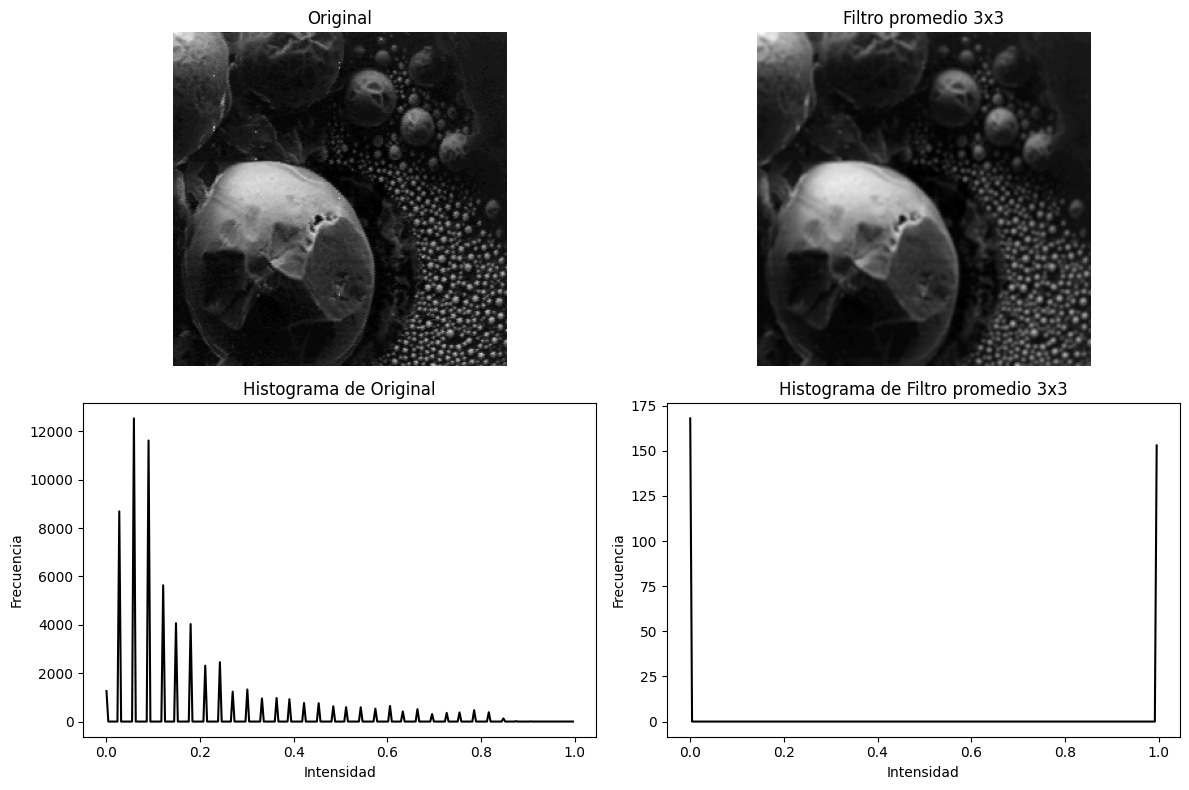

In [7]:
# Filtro promedio 3x3

imagen_con_filtro_mean3x3 = filters.rank.mean(img_ejercicio_gray, footprint_rectangle((3, 3)))

comparar_histogramas(img_ejercicio_gray, imagen_con_filtro_mean3x3, "Original", "Filtro promedio 3x3")

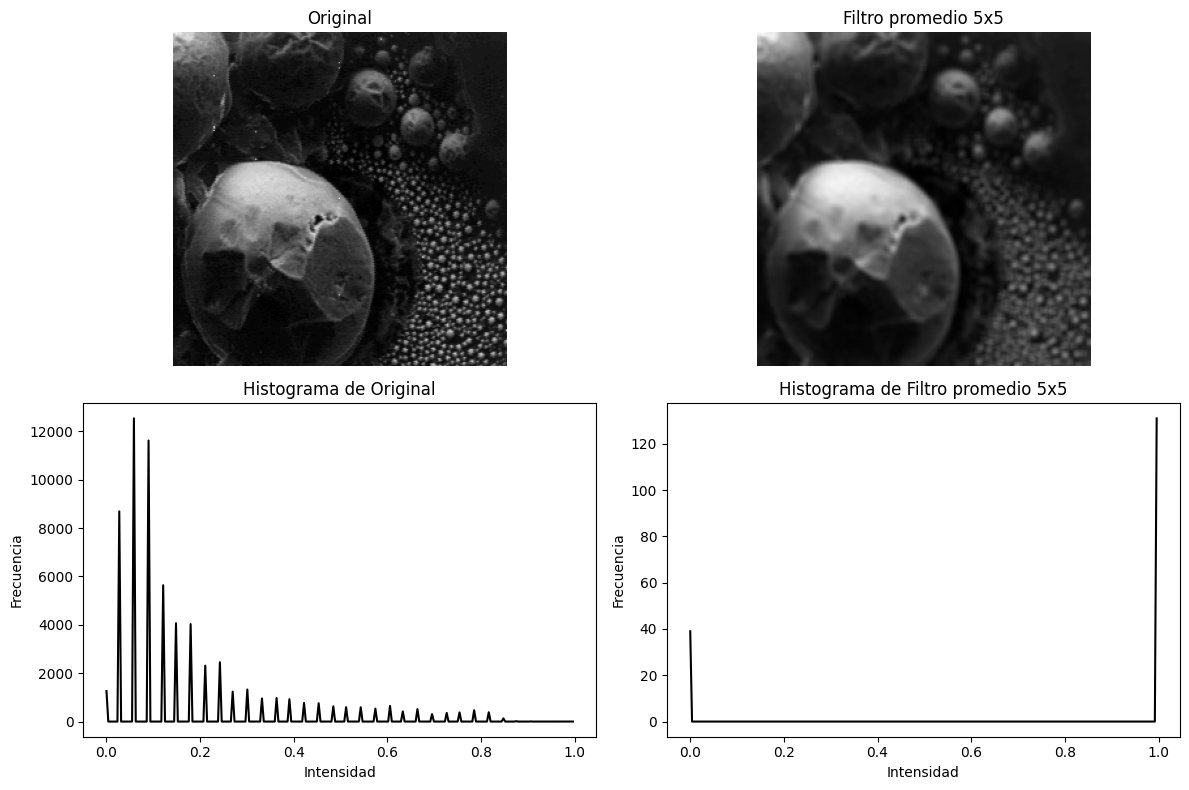

In [8]:
# Filtro promedio 5x5

imagen_con_filtro_mean5x5 = filters.rank.mean(img_ejercicio_gray, footprint_rectangle((5, 5)))

comparar_histogramas(img_ejercicio_gray, imagen_con_filtro_mean5x5, "Original", "Filtro promedio 5x5")

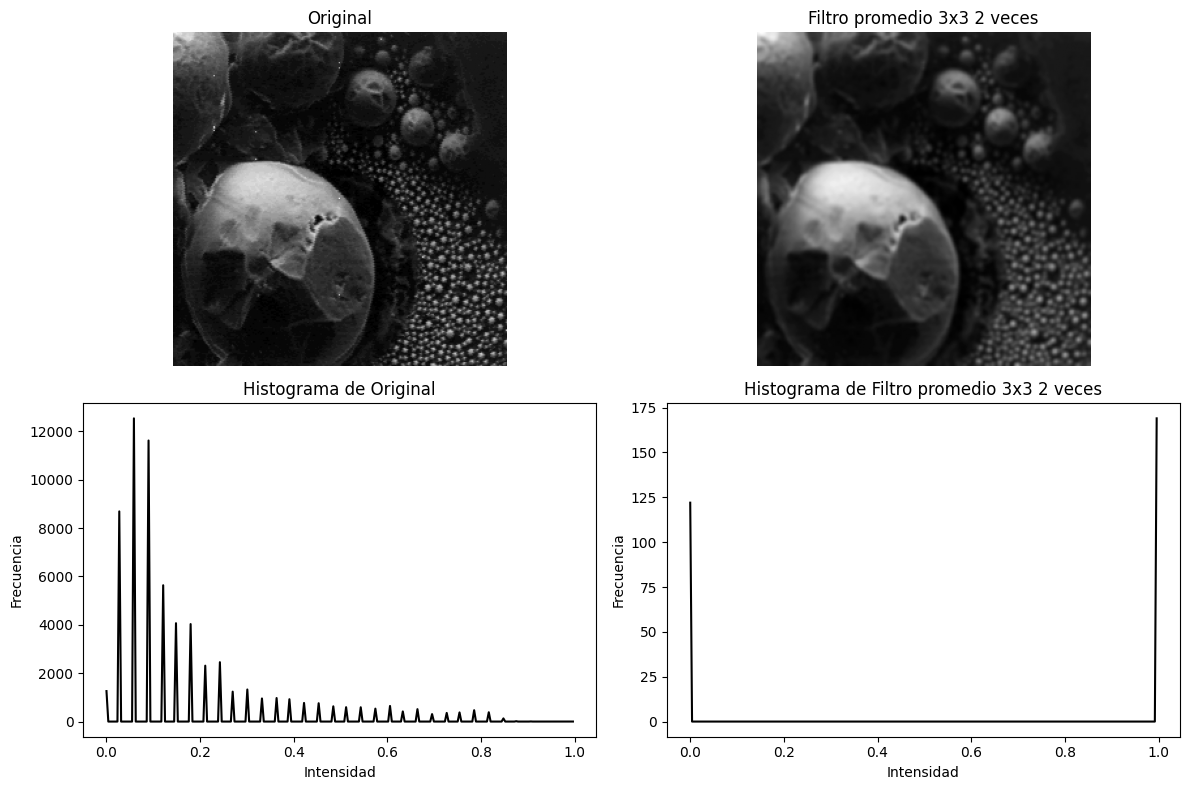

In [9]:
# Filtro promedio 3x3 2 veces

imagen_con_filtro_mean3x3_1 = filters.rank.mean(img_ejercicio_gray, footprint_rectangle((3, 3)))
imagen_con_filtro_mean3x3_2 = filters.rank.mean(imagen_con_filtro_mean3x3_1, footprint_rectangle((3, 3)))

comparar_histogramas(img_ejercicio_gray, imagen_con_filtro_mean3x3_2, "Original", "Filtro promedio 3x3 2 veces")

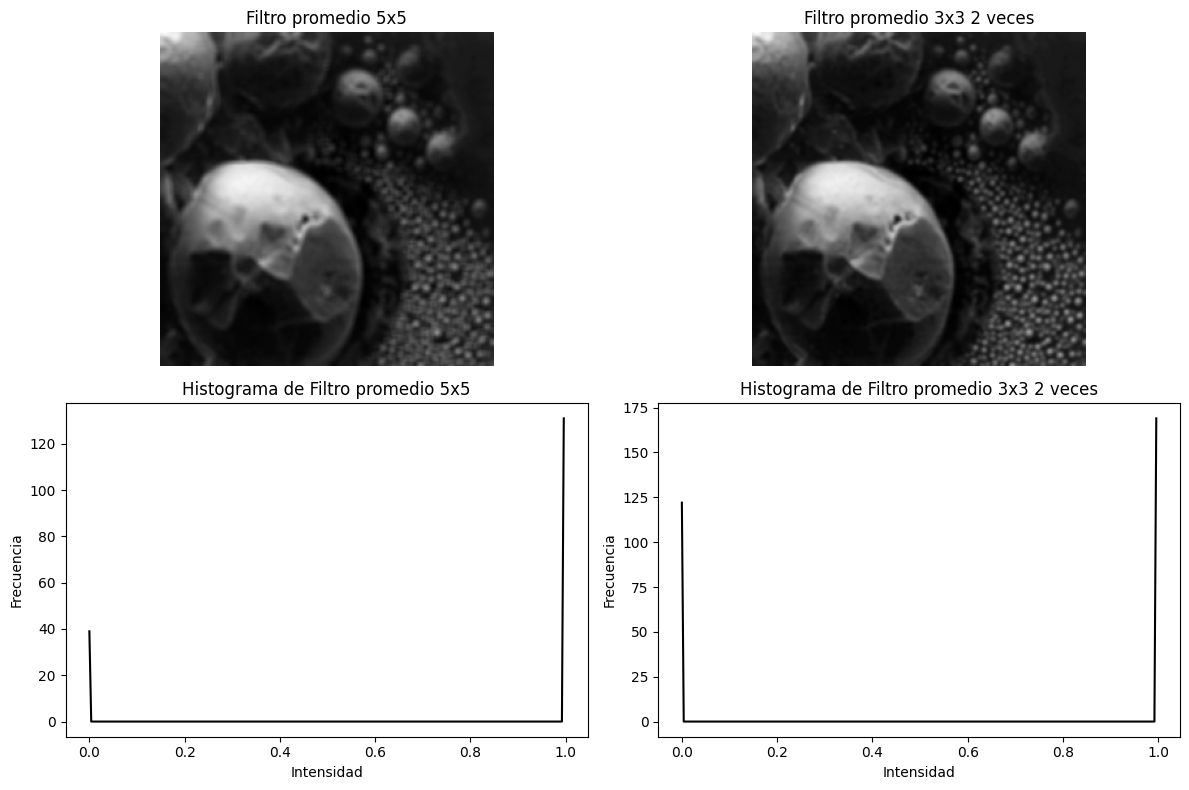

In [10]:
# Comparar filtros

comparar_histogramas(imagen_con_filtro_mean5x5, imagen_con_filtro_mean3x3_2, "Filtro promedio 5x5", "Filtro promedio 3x3 2 veces")